When we want to explore a new dataset by quickly creating visualizations, using these `pyplot` and `matplotlib` directly can be cumbersome. Thankfully, **pandas** has many methods for quickly generating common plots from data in `DataFrames`. Like `pyplot`, the plotting functionality in **pandas** is a wrapper for `matplotlib`. This means we can customize the plots when necessary by accessing the underlying `Figure`, `Axes`, and other `matplotlib` objects.

In this project, we'll explore how using the **pandas** plotting functionality along with the **Jupyter notebook** interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Our aim is to identify;

* Dominant Major_category for Men and Women
* Top Majors in Dominant category according to the highest Employment
* Top Majors in Dominant category according to highest Median Salary
* Do students in more popular majors make more money?
Using `scatter` plots
* How many majors are predominantly male? Predominantly female?
Using `histograms`.
* Which category of majors have the most students?
Using `bar` plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.info())
recent_grads.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [5]:
recent_grads[recent_grads["Men"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


Droping rows with missing values. `Matplotlib` expects that columns of values we pass in have matching lengths and missing values will cause `matplotlib` to throw errors

In [6]:
recent_grads = recent_grads.dropna(axis = 0)
# recent_grads.describe()

Only one row is deleted

In [7]:
# Grouping Data on the basis of Major_category
cat_groups = recent_grads.groupby("Major_category")

cat_groups.groups.keys()

dict_keys(['Agriculture & Natural Resources', 'Arts', 'Biology & Life Science', 'Business', 'Communications & Journalism', 'Computers & Mathematics', 'Education', 'Engineering', 'Health', 'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services', 'Interdisciplinary', 'Law & Public Policy', 'Physical Sciences', 'Psychology & Social Work', 'Social Science'])

In [8]:
# Calculating Average gender counts on each category

gender_ratio = cat_groups[["Men", "Women"]].mean()
gender_ratio.head()

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000


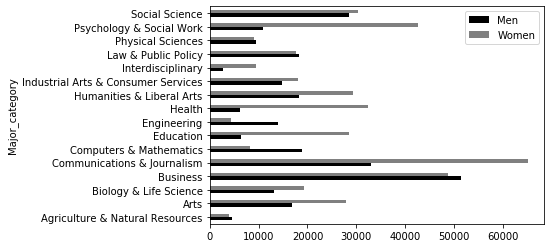

In [9]:
gender_ratio.plot.barh(color ={"Men":"black", "Women":"grey"})
plt.show()

In [10]:
# Classify each major category on gender dominant basis

def dominant(row):
    if row["Men"]> row["Women"]:
        return "Men"
    else:
        return "Women"
    
gender_ratio["Dominant_Gender"] = gender_ratio.apply(dominant, axis = 1)

gender_ratio.head()

,Men,Women,Dominant_Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Business,51373.230769,48809.538462,Men
Communications & Journalism,32980.250000,65170.000000,Women


In [11]:
# Grouping data on the basis of gender dominant category

dom_cat = gender_ratio.groupby("Dominant_Gender")

In [12]:
# Men dominant Major Categories

men_dom_cat = dom_cat.get_group("Men").index
men_dom_cat 

Index(['Agriculture & Natural Resources', 'Business',
       'Computers & Mathematics', 'Engineering', 'Law & Public Policy',
       'Physical Sciences'],
      dtype='object', name='Major_category')

In [13]:
# Women dominant Major Categories

women_dom_cat = dom_cat.get_group("Women").index
women_dom_cat 

Index(['Arts', 'Biology & Life Science', 'Communications & Journalism',
       'Education', 'Health', 'Humanities & Liberal Arts',
       'Industrial Arts & Consumer Services', 'Interdisciplinary',
       'Psychology & Social Work', 'Social Science'],
      dtype='object', name='Major_category')

In [14]:
# Separating gender dominant data frames

men_cat_df = recent_grads[recent_grads["Major_category"].isin(men_dom_cat)].copy()
women_cat_df = recent_grads[recent_grads["Major_category"].isin(women_dom_cat)].copy()

In [15]:
# number of Majors offer in men dominant Major Categories
men_cat_df["Major_category"].value_counts()

Engineering                        29
Business                           13
Computers & Mathematics            11
Physical Sciences                  10
Agriculture & Natural Resources     9
Law & Public Policy                 5
Name: Major_category, dtype: int64

In [16]:
# number of Majors offer in women dominant Major Categories
women_cat_df["Major_category"].value_counts()

Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Health                                 12
Psychology & Social Work                9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     7
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [17]:
# Sort data on the basis of Employed column
men_cat_df.sort_values("Employed", ascending = False, inplace = True)

In [18]:
# Top Major in each Major category on the basis of highest Employment
top_men_major_emp = men_cat_df.groupby("Major_category")[["Major", "Employed", "Median"]].first()
top_men_major_emp

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,17112,30000
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,276234,38000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,MECHANICAL ENGINEERING,76442,60000
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,125393,35000
Physical Sciences,CHEMISTRY,48535,39000


In [19]:
# Sort data on the basis of Median Salary column
sort_men_salary = men_cat_df.sort_values("Median", ascending = False).copy()

In [20]:
# Top Major in each Major category on the basis of highest Median Salary
top_men_major_sal = sort_men_salary.groupby("Major_category")[["Major", "Employed", "Median"]].first()
top_men_major_sal

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,AGRICULTURAL ECONOMICS,2174,40000
Business,ACTUARIAL SCIENCE,2912,62000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,1976,110000
Law & Public Policy,COURT REPORTING,930,54000
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1526,62000


In [21]:
# Normalizing columns

men_majors = top_men_major_sal.set_index("Major")
cols = men_majors

for c in men_majors:
    men_majors[c] = men_majors[c]/men_majors[c].sum()

men_majors

,Employed,Median
Major,,
AGRICULTURAL ECONOMICS,0.019479,0.104987
ACTUARIAL SCIENCE,0.026092,0.162730
COMPUTER SCIENCE,0.914717,0.139108
PETROLEUM ENGINEERING,0.017705,0.288714
COURT REPORTING,0.008333,0.141732
ASTRONOMY AND ASTROPHYSICS,0.013673,0.162730


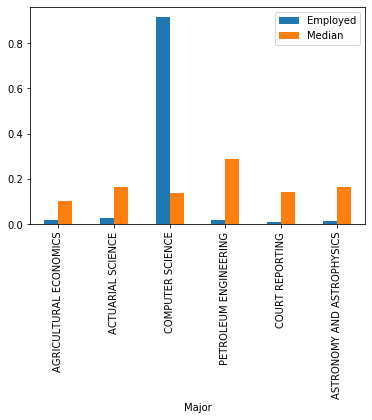

In [22]:
men_majors.plot.bar()
plt.show()

Most of the plotting functionality in pandas is contained within the `DataFrame.plot()` method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the `kind` parameter to specify the type of plot we want.

`DataFrame.plot()` method has a few parameters we can use for tweaking the **scatter plot**:

`recent_grads.plot(x= " ", y = " " , kind='scatter', title= " ", figsize=(5,10))`

or 

We can access the underlying matplotlib **Axes** object by assigning the return value to a variable:

`ax = recent_grads.plot(x=' ', y=' ', kind='scatter')`

`or
recent_grads.plot(x=' ', y=' ', kind='scatter', ax = ax)`

`ax.set_title(' ')`

# Pandas Scatter Plot

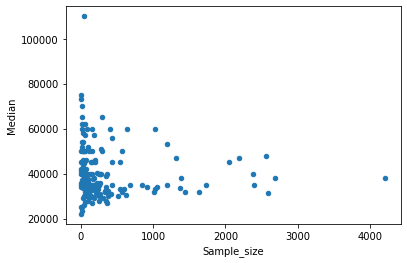

In [34]:
# Sample_size and Median

recent_grads.plot("Sample_size", "Median", kind = "scatter")
plt.show()

# Matplotlib Scatter Plot

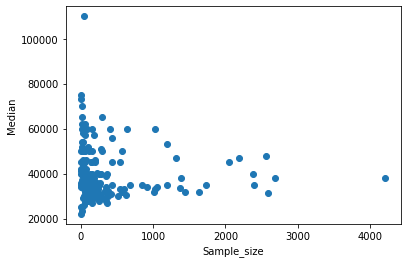

In [24]:
# Sample_size and Median
# same plot as above using matplotlib plot

plt.scatter(recent_grads["Sample_size"], recent_grads["Median"])
plt.xlabel("Sample_size")
plt.ylabel("Median")
plt.show()

# Pandas Histogram

To explore the distribution of values in a column, we can select it from the `DataFrame`, call `Series.plot()`, and set the `kind` parameter to `hist`:

`recent_grads['Sample_size'].plot(kind='hist')`

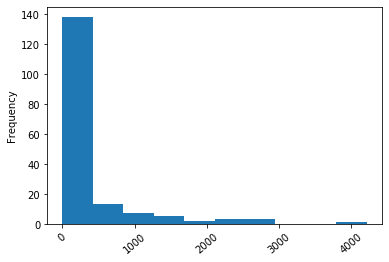

In [25]:
recent_grads["Sample_size"].plot(kind = "hist", rot = 40)
plt.show()

# Matplotlib Histogram

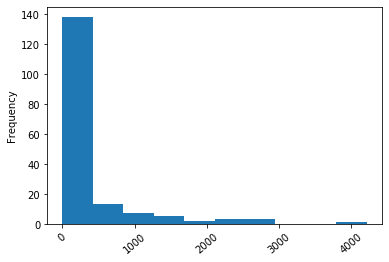

In [26]:
plt.hist(recent_grads["Sample_size"])
plt.xticks(rotation = 40)
plt.ylabel("Frequency")
plt.show()

# Pandas Histogram (Mulitiple columns)

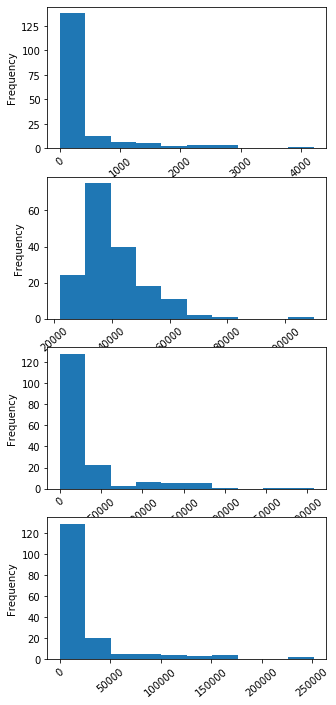

In [27]:
# Histogram of mutliple columns 

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate",
        "Men", "Women"]

fig = plt.figure(figsize = (5,12))
# for first 4 histogram
for i in range(0,4):
    ax = fig.add_subplot(4,1,i+1)
    ax = recent_grads[cols[i]].plot(kind = "hist", rot = 40)

# Matplotlib Histogram (Mulitiple columns)

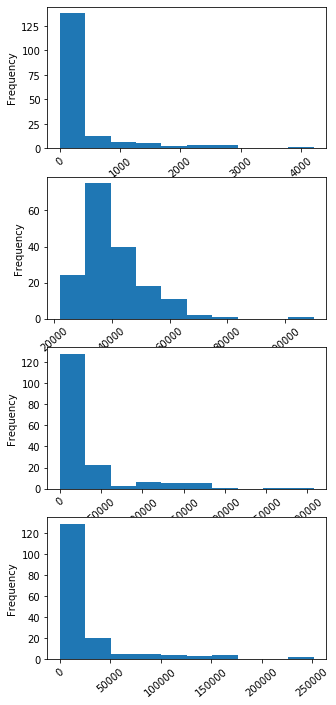

In [28]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
        "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize = (5,12))
# for first 4 histogram
for i in range(4):
    ax = fig.add_subplot(4,1,i+1)
    ax.hist(recent_grads[cols[i]])
    ax.set_ylabel("Frequency")
    plt.xticks(rotation = 40)
plt.show()

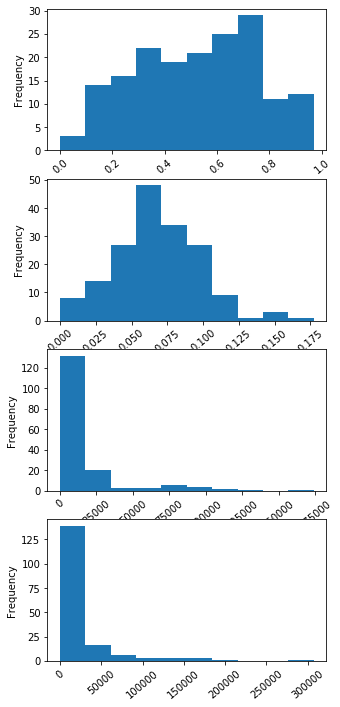

In [29]:
fig = plt.figure(figsize = (5,12))

# histogram for remaining 4 Using Pandas Histogram

for i in range(4,8):
    # print(cols[i])
    ax = fig.add_subplot(4,1,i-3)
    ax = recent_grads[cols[i]].plot(kind = "hist", rot = 40)


The `DataFrame.plot()` and `Series.plot()` methods have many of the same parameters but are used for different use cases. We use `Series.plot()` to plot a specific column and `DataFrame.plot()` to generate plots that use values from multiple columns.

If we've looked at the documentation for `Series.plot()`, we'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using `Series.hist()`, which contains parameters specific to customizing histograms:

`recent_grads['Sample_size'].hist(bins=25, range=(0,5000))`

# Pandas Scatter Matrix Plot

We created individual **scatter** plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A **scatter matrix** plot combines both `scatter` plots and `histograms` into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

A **scatter matrix** plot consists of `n` by `n` plots on a grid, where `n` is the number of columns, the plots on the diagonal are `histograms`, and the non-diagonal plots are `scatter` plots

This function is part of the `pandas.plotting` module and needs to be imported separately.

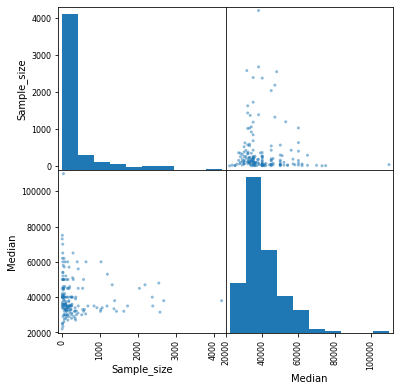

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]], figsize = (6,6))
plt.show()


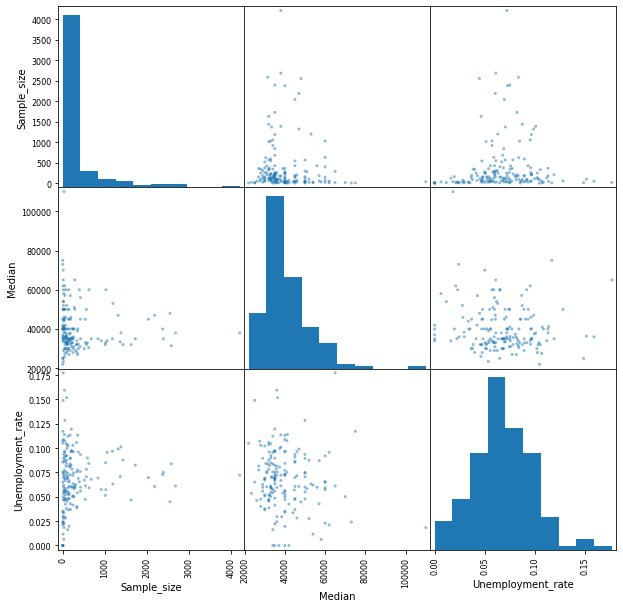

In [31]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], 
               figsize = (10,10))
plt.show()

While passing in a `DataFrame` with 2 columns returns a 2 by 2 **scatter matrix** plot (4 plots total), passing in one with 3 returns a 3 by 3 **scatter matrix** plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. 

If we increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if we increase the plotting area using the figsize parameter).

# Pandas, Bar Plots

To create bar plots in `matplotlib`, we had to specify many aspects of the bar plot ourselves. We had to specify the `locations`, `labels`, `lengths`, and `widths` of the bars. 

When creating `bar` plots using **pandas**, we only need specify the data we want the bars to represent and the labels for each bar

By default, **pandas** will use the default labels on the x-axis for each bar (1 to n) from `matplotlib`. If we instead use the `DataFrame.plot.bar()` method, we can use the `x` parameter to specify the **labels** and the `y` parameter to specify the **data** for the bars:

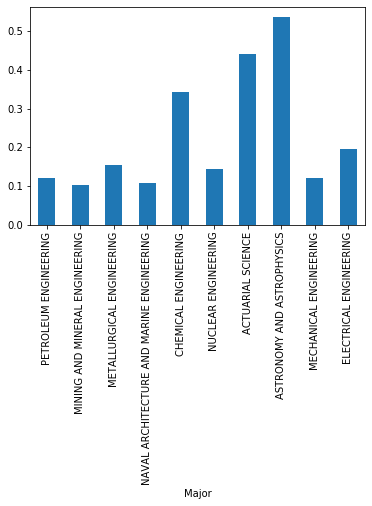

In [32]:
# recent_grads["ShareWomen"].head(10).plot(kind = "bar")
recent_grads.head(10).plot.bar(x = "Major", y = 'ShareWomen', legend = False)
#recent_grads.tail(10).plot.bar(x = "Major", y = "ShareWomen")
plt.show()

# Matplotlib Bar Plots

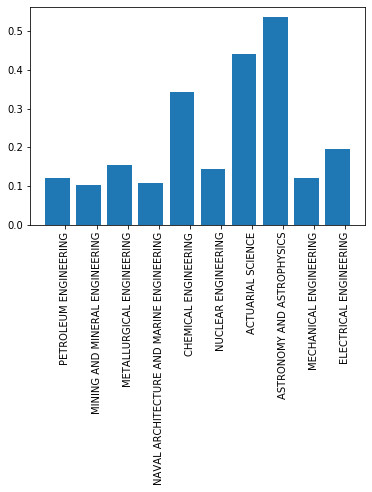

In [33]:
# recent_grads.head(10).plot.bar(x = "Major", y = 'ShareWomen', legend = False)
fig, ax = plt.subplots()
plt.bar(np.arange(10)+.75,recent_grads["ShareWomen"].head(10))
plt.xticks(range(1,11))
ax.set_xticklabels(recent_grads["Major"].head(10), rotation = 90)
plt.show()                              